In [1]:
import numpy as np

from fromscratchtoml.toolbox import binary_visualize
from fromscratchtoml.toolbox import binary_visualize_bokeh
from fromscratchtoml.cluster import KMeans

from fromscratchtoml.toolbox.random import Distribution
from bokeh.plotting import output_notebook

output_notebook()
%matplotlib inline

Loading BokehJS ...

In [2]:
# from bokeh.charts import Scatter, show
import sys
sys.executable

'/home/kvrao/anaconda/envs/fstml/bin/python'

## KMeans unsupervised clustering algorithm.

In [3]:
X1 = Distribution.linear(pts=500, covr=[[1.2, -1],[-1, 1]], mean=[0, 0])
X2 = Distribution.linear(pts=500, covr=[[1.2, -1],[-1, 1]], mean=[-1, -2])
X3 = Distribution.linear(pts=500, covr=[[1.2, -1],[-1, 1]], mean=[6, -3])

X = np.vstack([X1, X2, X3])

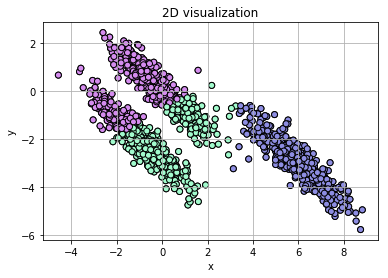

In [4]:
y_pred = KMeans(n_clusters=3).fit_predict(X)

binary_visualize(X, y_pred)

In [5]:
binary_visualize_bokeh(X, y_pred)

In [6]:
X1 = Distribution.linear(pts=500, covr=[[0, -1],[-1, 0]], mean=[0, 0])
X2 = Distribution.linear(pts=500, covr=[[0, -1],[-1, 0]], mean=[-0, -3])
X3 = Distribution.linear(pts=500, covr=[[0, -1],[-1, 0]], mean=[6, -3])

X = np.vstack([X1, X2, X3])

/home/kvrao/anaconda/envs/fstml/lib/python3.6/site-packages/fromscratchtoml-0.0.2-py3.6.egg/fromscratchtoml/toolbox/random.py:49: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, covr, pts)


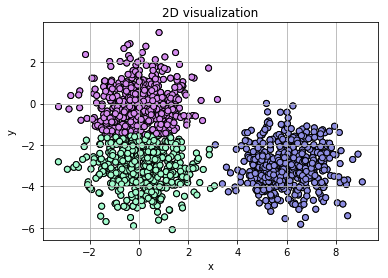

In [7]:
y_pred = KMeans(n_clusters=3).fit_predict(X)

binary_visualize(X, y_pred)

In [8]:
binary_visualize_bokeh(X, y_pred)

In [9]:
X1 = Distribution.linear(pts=500, covr=[[0, -1],[-1, 0]], mean=[0, 0])
X2 = Distribution.linear(pts=500, covr=[[0, -1],[-1, 0]], mean=[0, -6])
X3 = Distribution.linear(pts=500, covr=[[0, -1],[-1, 0]], mean=[6, -3])

X = np.vstack([X1, X2, X3])

/home/kvrao/anaconda/envs/fstml/lib/python3.6/site-packages/fromscratchtoml-0.0.2-py3.6.egg/fromscratchtoml/toolbox/random.py:49: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, covr, pts)


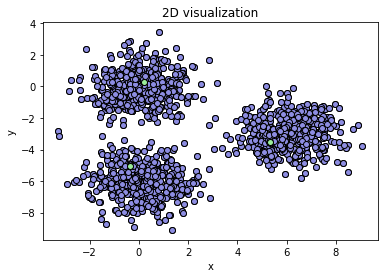

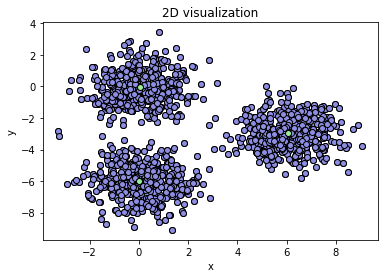

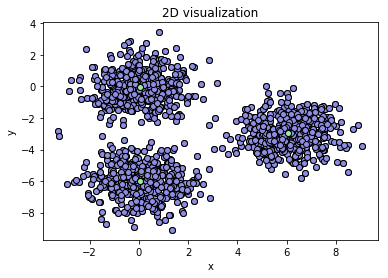

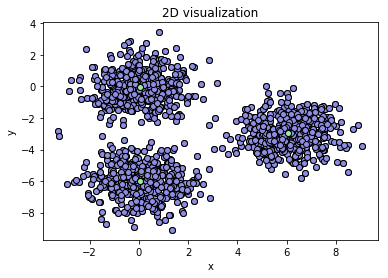

KMeans({'n_clusters': 3, 'max_iter': 500, 'vis_iter': 1})

In [10]:
km3 = KMeans(n_clusters=3, vis_iter=1)
km3.fit(X)

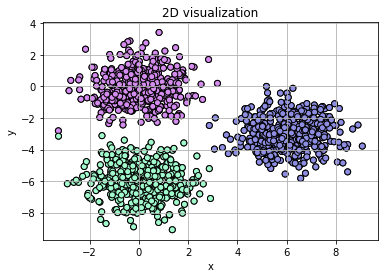

In [11]:
binary_visualize(X, km3.labels)

In [12]:
km10 = KMeans(n_clusters=10)
km10.fit(X)

KMeans({'n_clusters': 10, 'max_iter': 500, 'vis_iter': False})

In [13]:
len(km10.labels)

1500

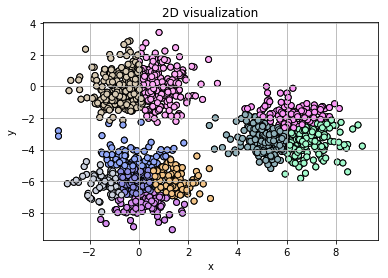

In [14]:
binary_visualize(X, km10.labels)


In [15]:
binary_visualize_bokeh(X, km10.labels)

In [16]:
from bokeh.models import CustomJS, Slider
from bokeh.layouts import column, row

from bokeh.plotting import figure, show, ColumnDataSource, output_notebook
from bokeh.palettes import Set3
output_notebook()

x = X[:, 0]
y = X[:, 1]
colored_y = [Set3[12][int(km10.labels[i])] for i in range(len(km10.labels))]
line_color = ['black' for i in range(len(km10.labels))]

import pickle
with open('KMEANS_fill_colors.pkl', 'rb') as f:
    fill_colors = pickle.load( f)
    
source = ColumnDataSource(data=dict(x=x, y=y, color=colored_y, line_color=line_color))

TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
]

p = figure(plot_height=600, plot_width=800, tooltips=TOOLTIPS, title="DBSCAN")
p.circle('x','y', radius=0.1, fill_color='color', source=source, line_color='line_color')

callback = CustomJS(args=dict(source=source, fill_colors=fill_colors), code="""
    var data = source.data
    var value = cb_obj.value

    data.color = fill_colors[value]
    source.change.emit();
""")

slider = Slider(start=2, end=10, value=10, step=1, title="Clusters",
                callback=callback)
layout = column(slider, p)

show(layout)

Loading BokehJS ...

In [17]:
colors = {}
for j in range(1, 11):
    km = KMeans(n_clusters=j)
    km.fit(X)
    colors[j] = [Set3[12][int(km.labels[i])] for i in range(len(km.labels))]

In [18]:
fill_colors = colors

In [19]:
import pickle
with open('KMEANS_fill_colors.pkl', 'wb') as f:
    pickle.dump(fill_colors, f)